In [7]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

<h1> Data variables </h1>

<ul>
<li>Age | Objective Feature | age | int (days) Linear Regression/Clustering and then see each category data points (convert to years)
<li>Height | Objective Feature | height | int (cm) | Linear Regression/Clustering and then see each category data points (maybe not)
<li>Weight | Objective Feature | weight | float (kg) | Linear Regression/Clustering and then see each category data points (maybe not)
<li>Gender | Objective Feature | gender | categorical code | Correlation-Matrix to determine the probability analysis (split into male and female and then see how many cvd vs non-cvd and see are they similar or there is a correlation)
<li>BMI | added feature using height and weight | float | classification tree
<li>Systolic blood pressure | Examination Feature | ap_hi | int | classification tree
<li>Diastolic blood pressure | Examination Feature | ap_lo | int | classification tree
<li>Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal | clustering and do analysis on it
<li>Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal | clustering and do analysis on it
<li>Smoking | Subjective Feature | smoke | binary | Correlation-Matrix to determine the probability analysis (split into yes and no and then see how many cvd vs non-cvd and see are they similar or there is a correlation)
<li>Alcohol intake | Subjective Feature | alco | binary | Correlation-Matrix to determine the probability analysis (split into yes and no and then see how many cvd vs non-cvd and see are they similar or there is a correlation)
<li>Physical activity | Subjective Feature | active | binary | Correlation-Matrix to determine the probability analysis (split into yes and no and then see how many cvd vs non-cvd and see are they similar or there is a correlation)
<li>Presence or absence of cardiovascular disease | Target Variable | cardio | binary | Response


Binary Logistic Regression can be used

//get rid of outliers: -ve blood pressure, short height ie less than 120cm or a percentile, co


In [8]:
cardioData = pd.read_csv('cardio_train.csv', delimiter=';', nrows = 70000) #delimiter function specifies the boundary between separate, independant regions in plain text or other data stream
cardioData.dataframeName = 'cardio_train.csv'
cardioData.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
cardioNumData = pd.DataFrame(cardioData[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',]])
cardioNumData.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


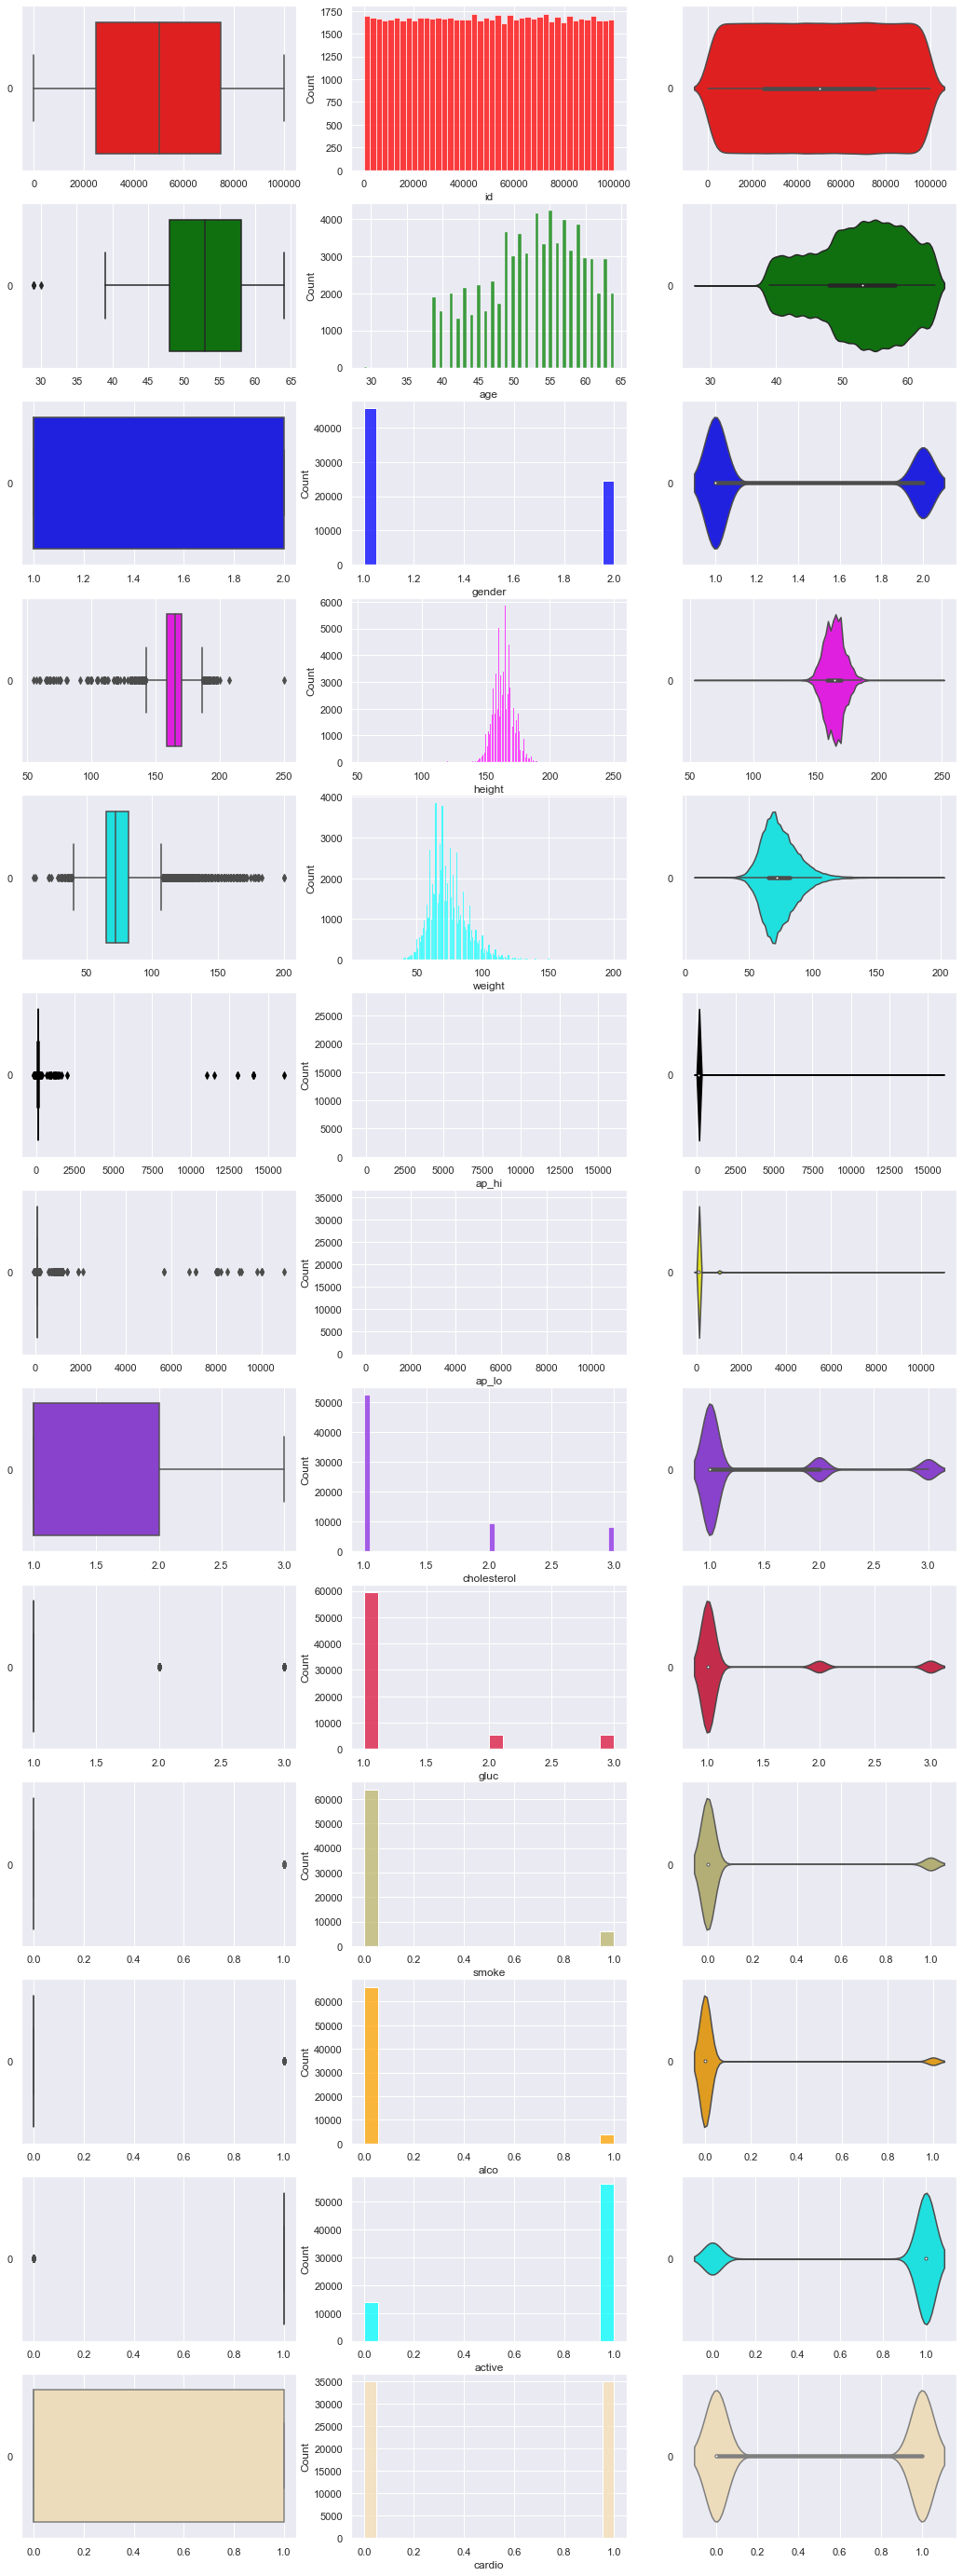

In [4]:
# Draw the distributions of all variables
f, axes = plt.subplots(13, 3, figsize=(18, 50))
colors = ["red", "green", "blue", "magenta", "cyan", "black", "yellow", "blueviolet", "crimson", "darkkhaki", "orange", "aqua", "wheat"  ]

count = 0
for var in cardioNumData:
    sb.boxplot(data=cardioNumData[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data=cardioNumData[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(data=cardioNumData[var], orient = "h", color = colors[count], ax = axes[count,2])
    count += 1

                   id       age    gender    height    weight     ap_hi  \
id           1.000000  0.003858  0.003502 -0.003038 -0.001834  0.003356   
age          0.003858  1.000000 -0.022793 -0.081403  0.053572  0.020927   
gender       0.003502 -0.022793  1.000000  0.499033  0.155416  0.006005   
height      -0.003038 -0.081403  0.499033  1.000000  0.291001  0.005488   
weight      -0.001834  0.053572  0.155416  0.291001  1.000000  0.030702   
ap_hi        0.003356  0.020927  0.006005  0.005488  0.030702  1.000000   
ap_lo       -0.002529  0.017563  0.015254  0.006150  0.043703  0.016086   
cholesterol  0.006106  0.153992 -0.035821 -0.050226  0.141755  0.023778   
gluc         0.002467  0.098572 -0.020491 -0.018595  0.106864  0.011841   
smoke       -0.003699 -0.047541  0.338135  0.187989  0.067752 -0.000922   
alco         0.001210 -0.029675  0.170966  0.094419  0.067077  0.001408   
active       0.003755 -0.009809  0.005866 -0.006570 -0.016864 -0.000033   
cardio       0.003799  0.

<AxesSubplot:>

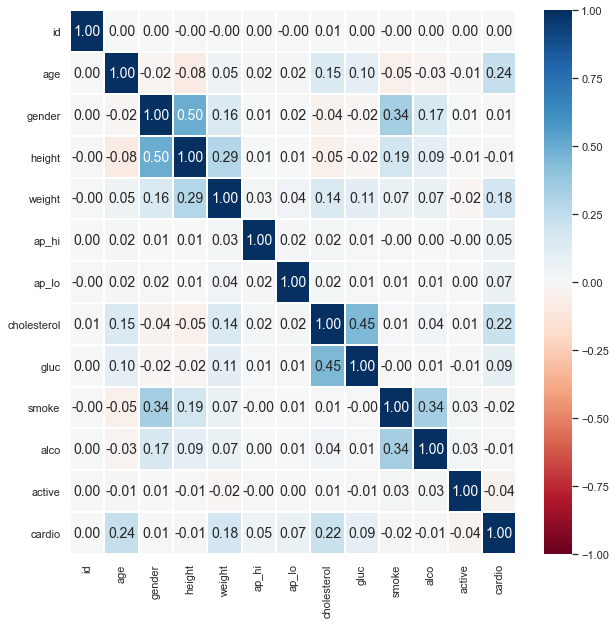

In [5]:
print(cardioNumData.corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(cardioNumData.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

KeyboardInterrupt: 

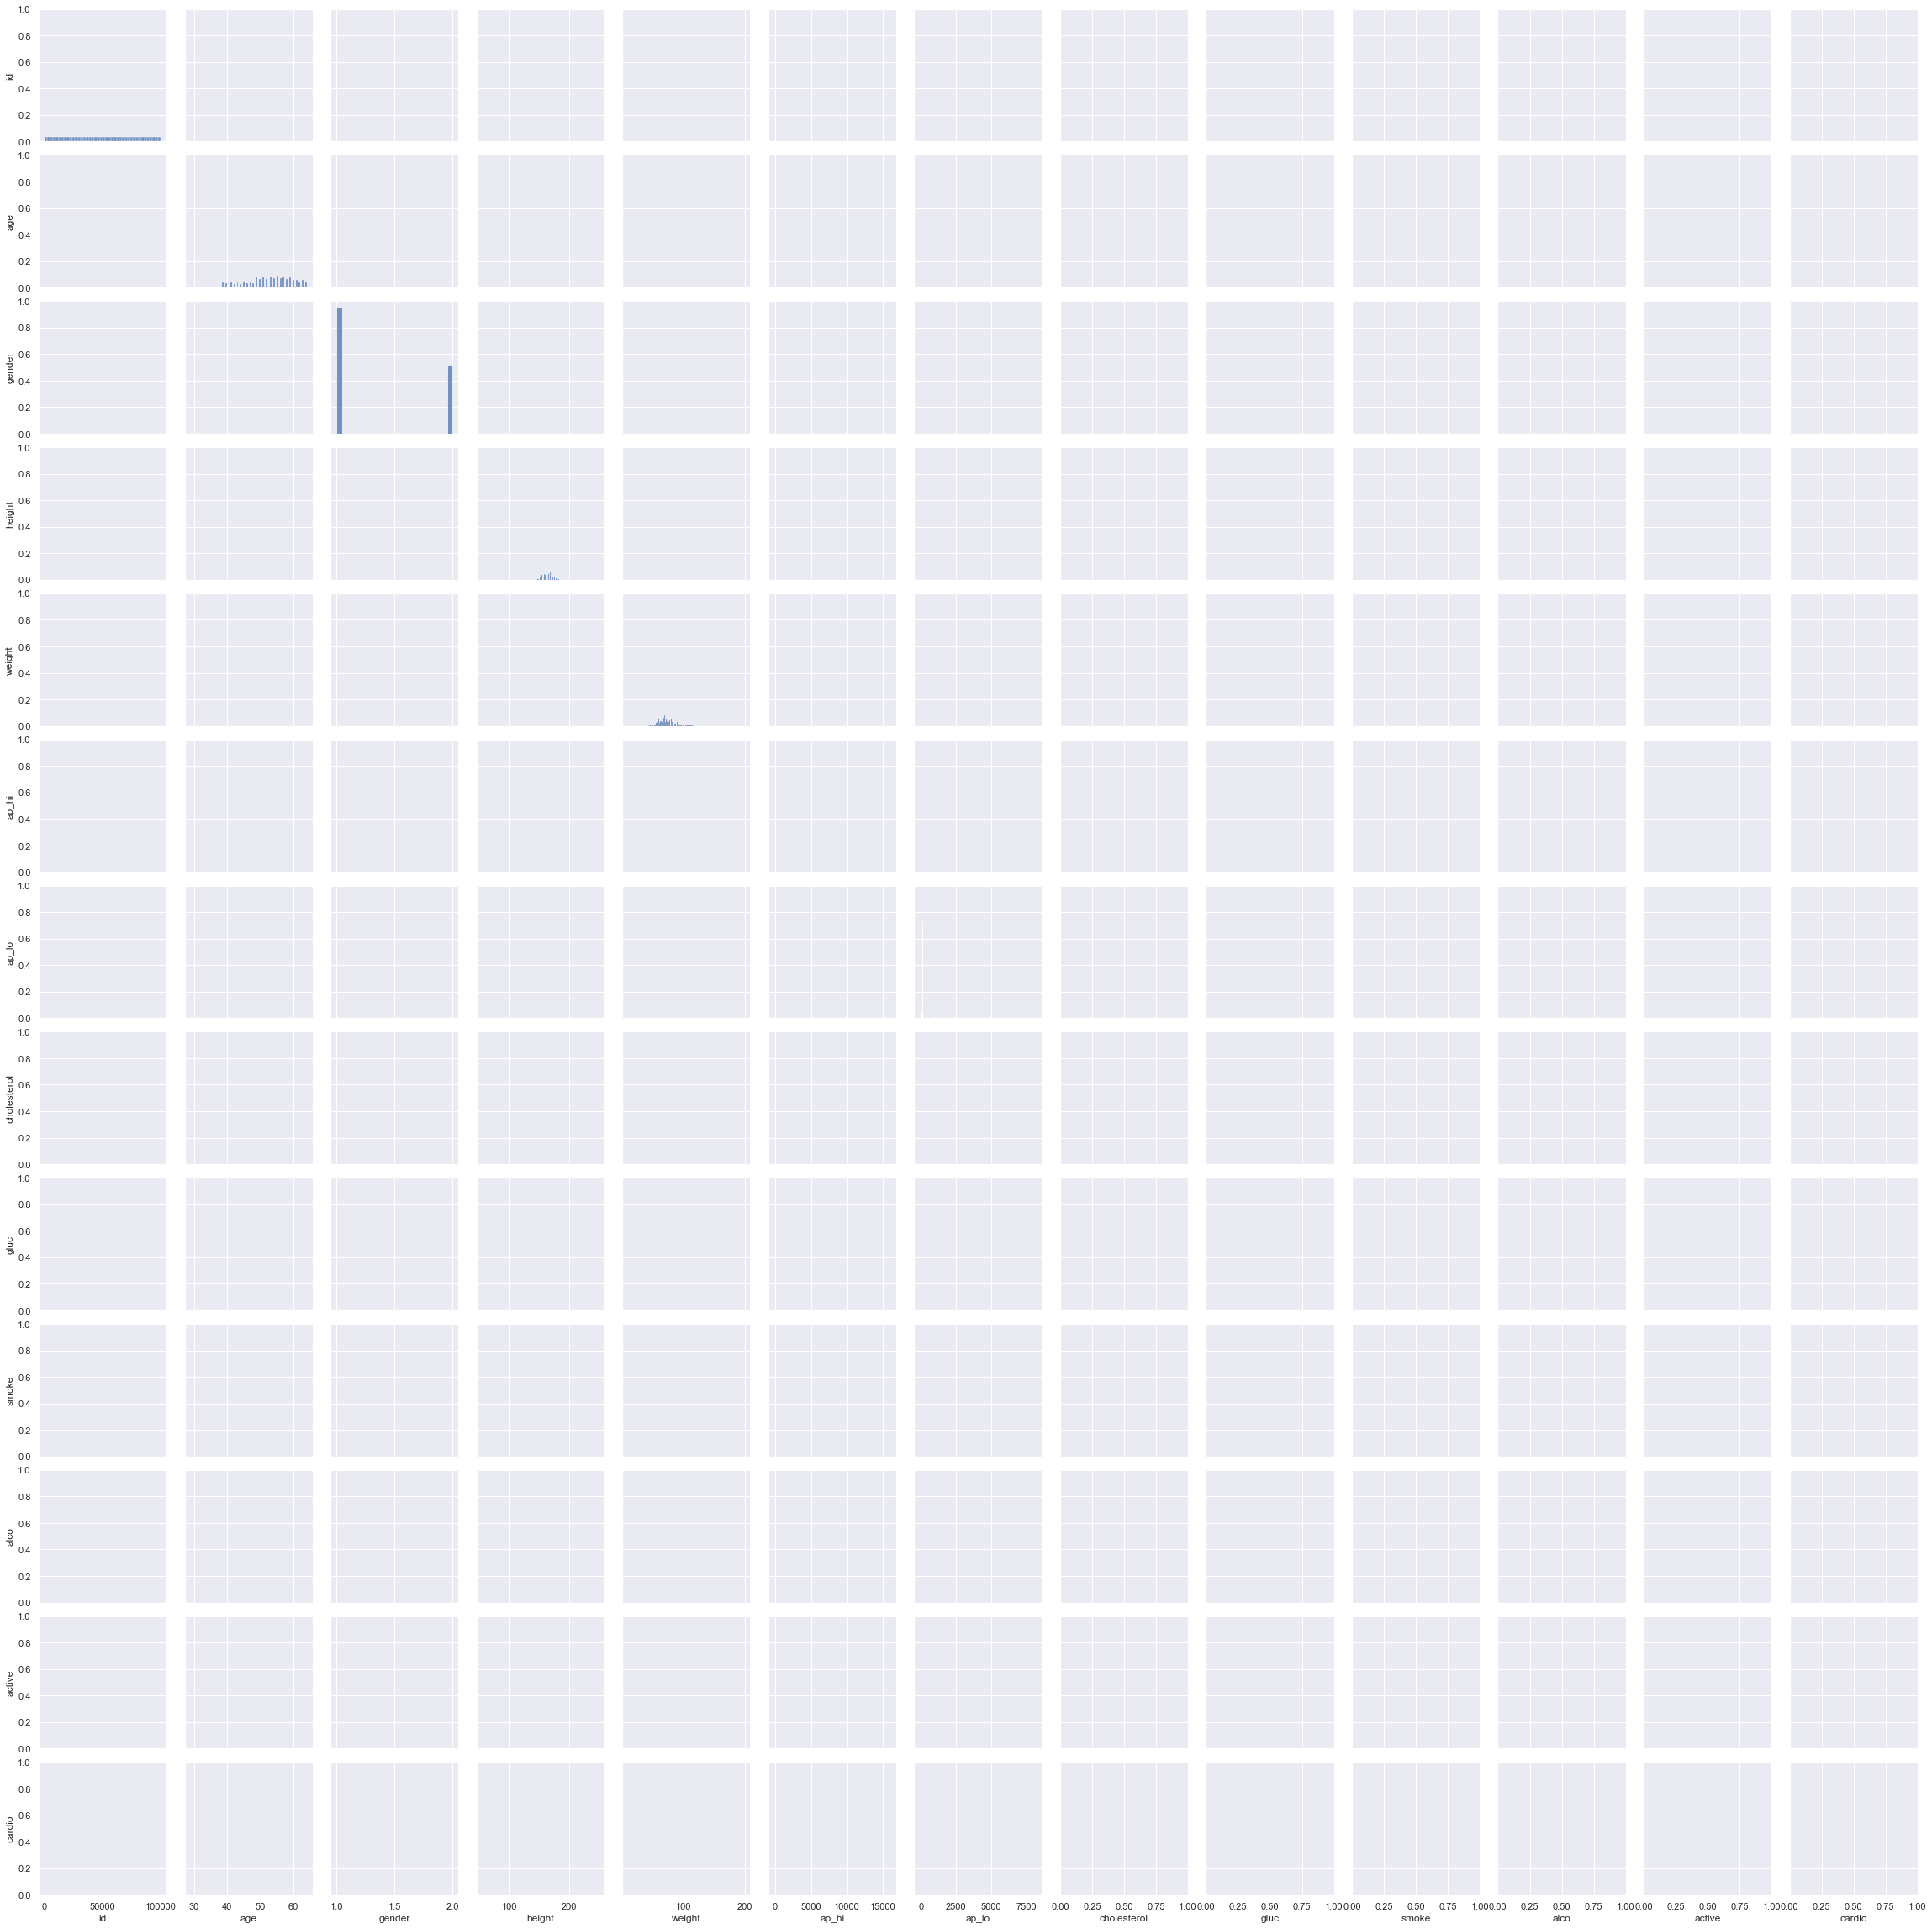

In [6]:
sb.pairplot(data = cardioNumData)

In [ ]:
cardioCatData = pd.DataFrame(cardioData[['cholesterol','age', 'height', 'weight','gender', 'ap_hi', 'ap_lo', 'gluc', 'smoke','alco', 'active', 'cardio']])
cardioCatData.head()

,cholesterol,age,height,weight,gender,ap_hi,ap_lo,gluc,smoke,alco,active,cardio
0,1,50,168,62,2,110,80,1,0,0,1,0
1,3,55,156,85,1,140,90,1,0,0,1,1
2,3,51,165,64,1,130,70,1,0,0,0,1
3,1,48,169,82,2,150,100,1,0,0,1,1
4,1,47,156,56,1,100,60,1,0,0,0,0


In [ ]:
cardioCatData['age'] = cardioCatData['age'].astype('category')
cardioCatData['height'] = cardioCatData['height'].astype('category')
cardioCatData['weight'] = cardioCatData['weight'].astype('category')
cardioCatData['gender'] = cardioCatData['gender'].astype('category')
cardioCatData['ap_hi'] = cardioCatData['ap_hi'].astype('category')
cardioCatData['ap_lo'] = cardioCatData['ap_lo'].astype('category')
cardioCatData['cholesterol'] = cardioCatData['cholesterol'].astype('category')
cardioCatData['gluc'] = cardioCatData['gluc'].astype('category')
cardioCatData['smoke'] = cardioCatData['smoke'].astype('category')
cardioCatData['alco'] = cardioCatData['alco'].astype('category')
cardioCatData['active'] = cardioCatData['active'].astype('category')
cardioCatData['cardio'] = cardioCatData['cardio'].astype('category')
cardioCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   cholesterol  70000 non-null  category
 1   age          70000 non-null  category
 2   height       70000 non-null  category
 3   weight       70000 non-null  category
 4   gender       70000 non-null  category
 5   ap_hi        70000 non-null  category
 6   ap_lo        70000 non-null  category
 7   gluc         70000 non-null  category
 8   smoke        70000 non-null  category
 9   alco         70000 non-null  category
 10  active       70000 non-null  category
 11  cardio       70000 non-null  category
dtypes: category(12)
memory usage: 1.0 MB


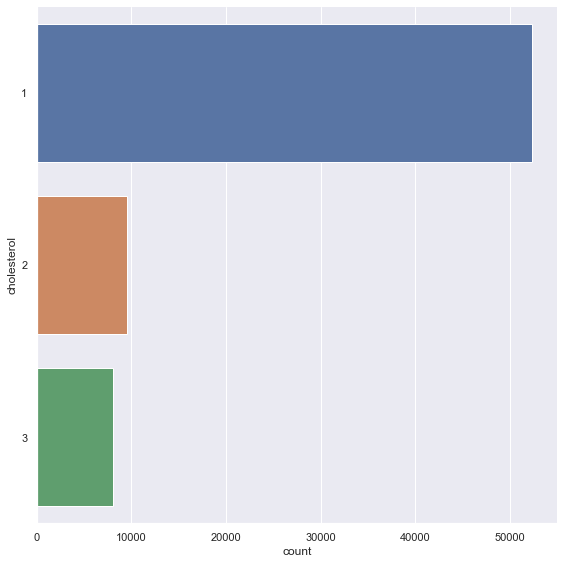

In [ ]:
sb.catplot(y = 'cholesterol', data = cardioCatData, kind = "count", height = 8)

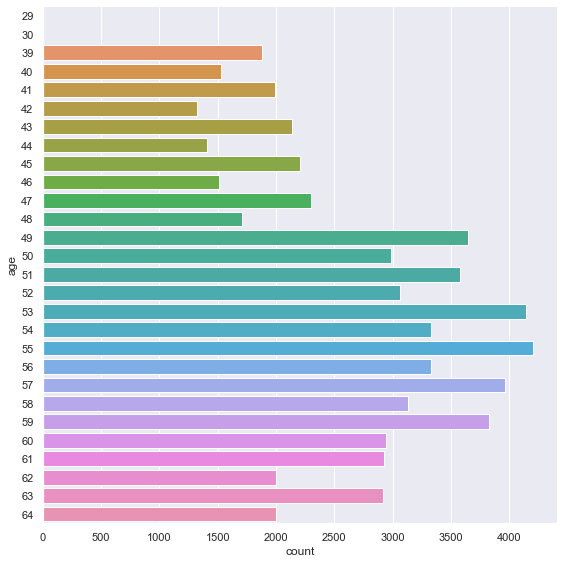

In [ ]:
sb.catplot(y = 'age', data = cardioCatData, kind = "count", height = 8,)


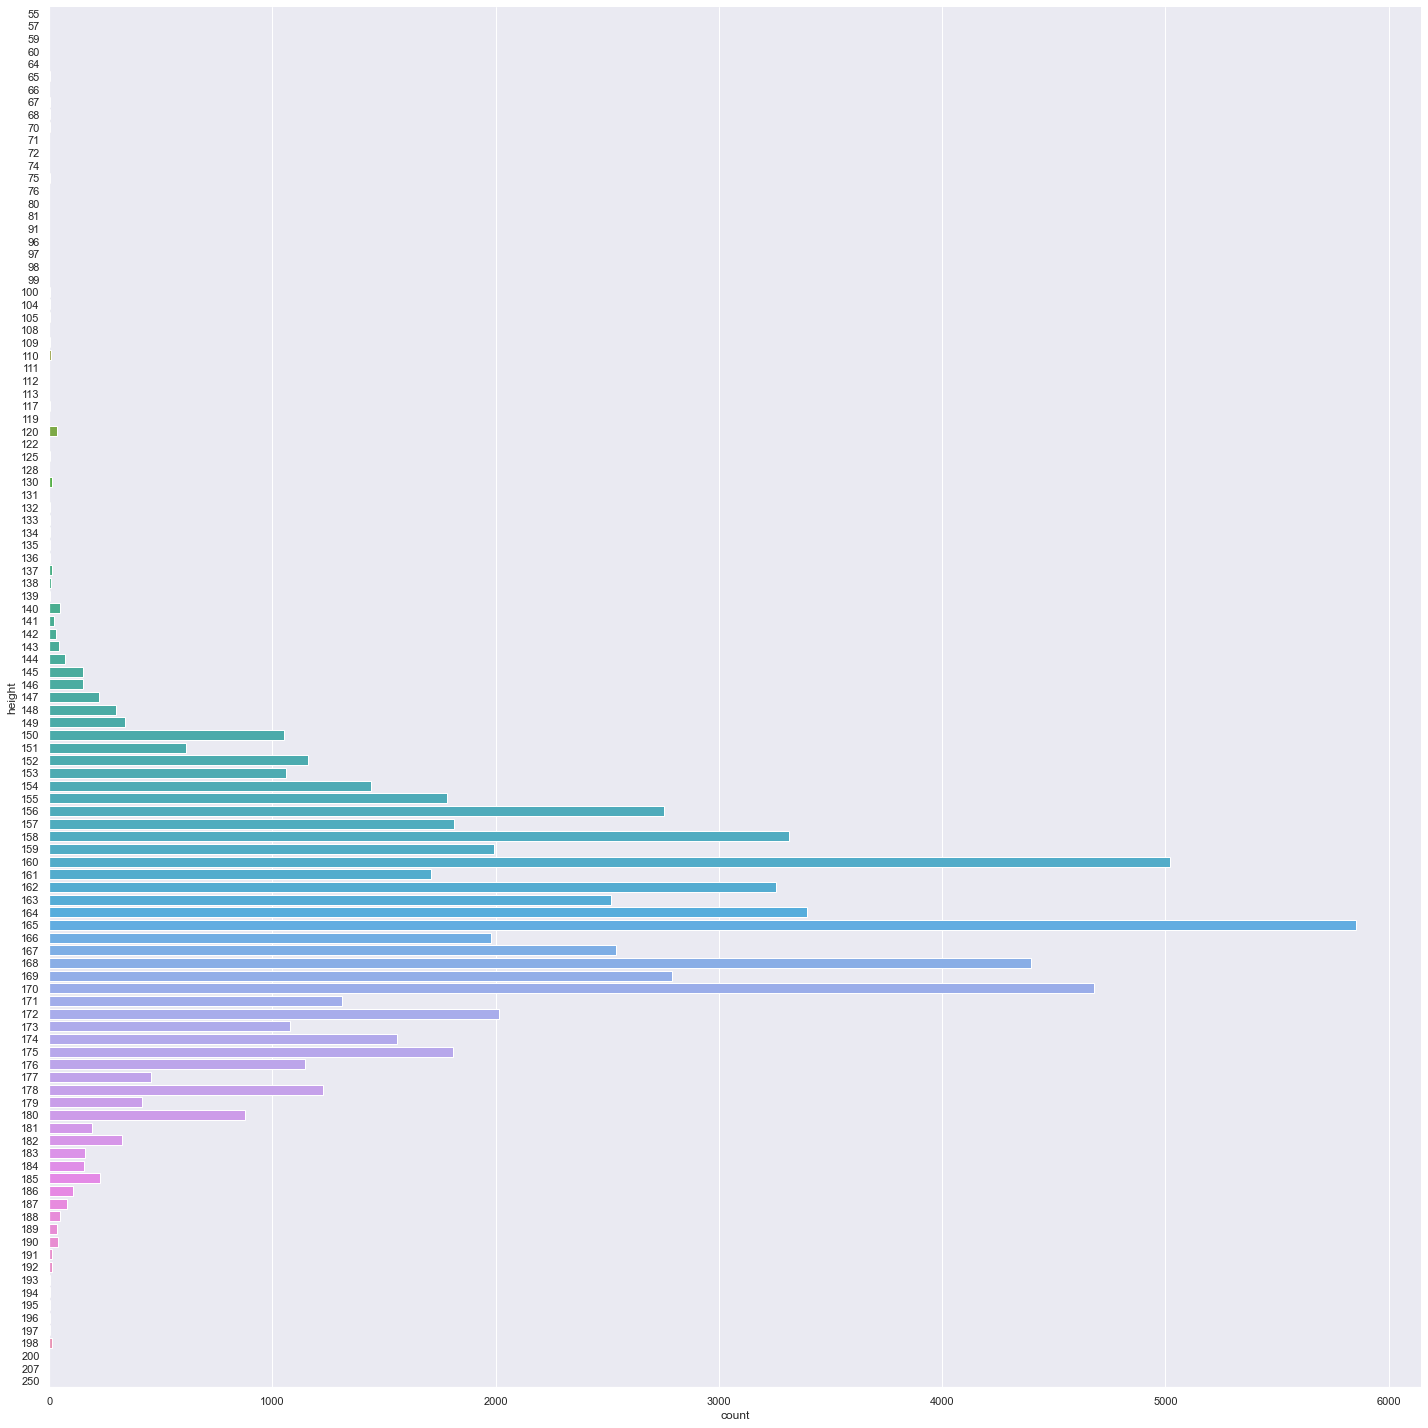

In [ ]:
sb.catplot(y = 'height', data = cardioCatData, kind = "count", height = 20,)

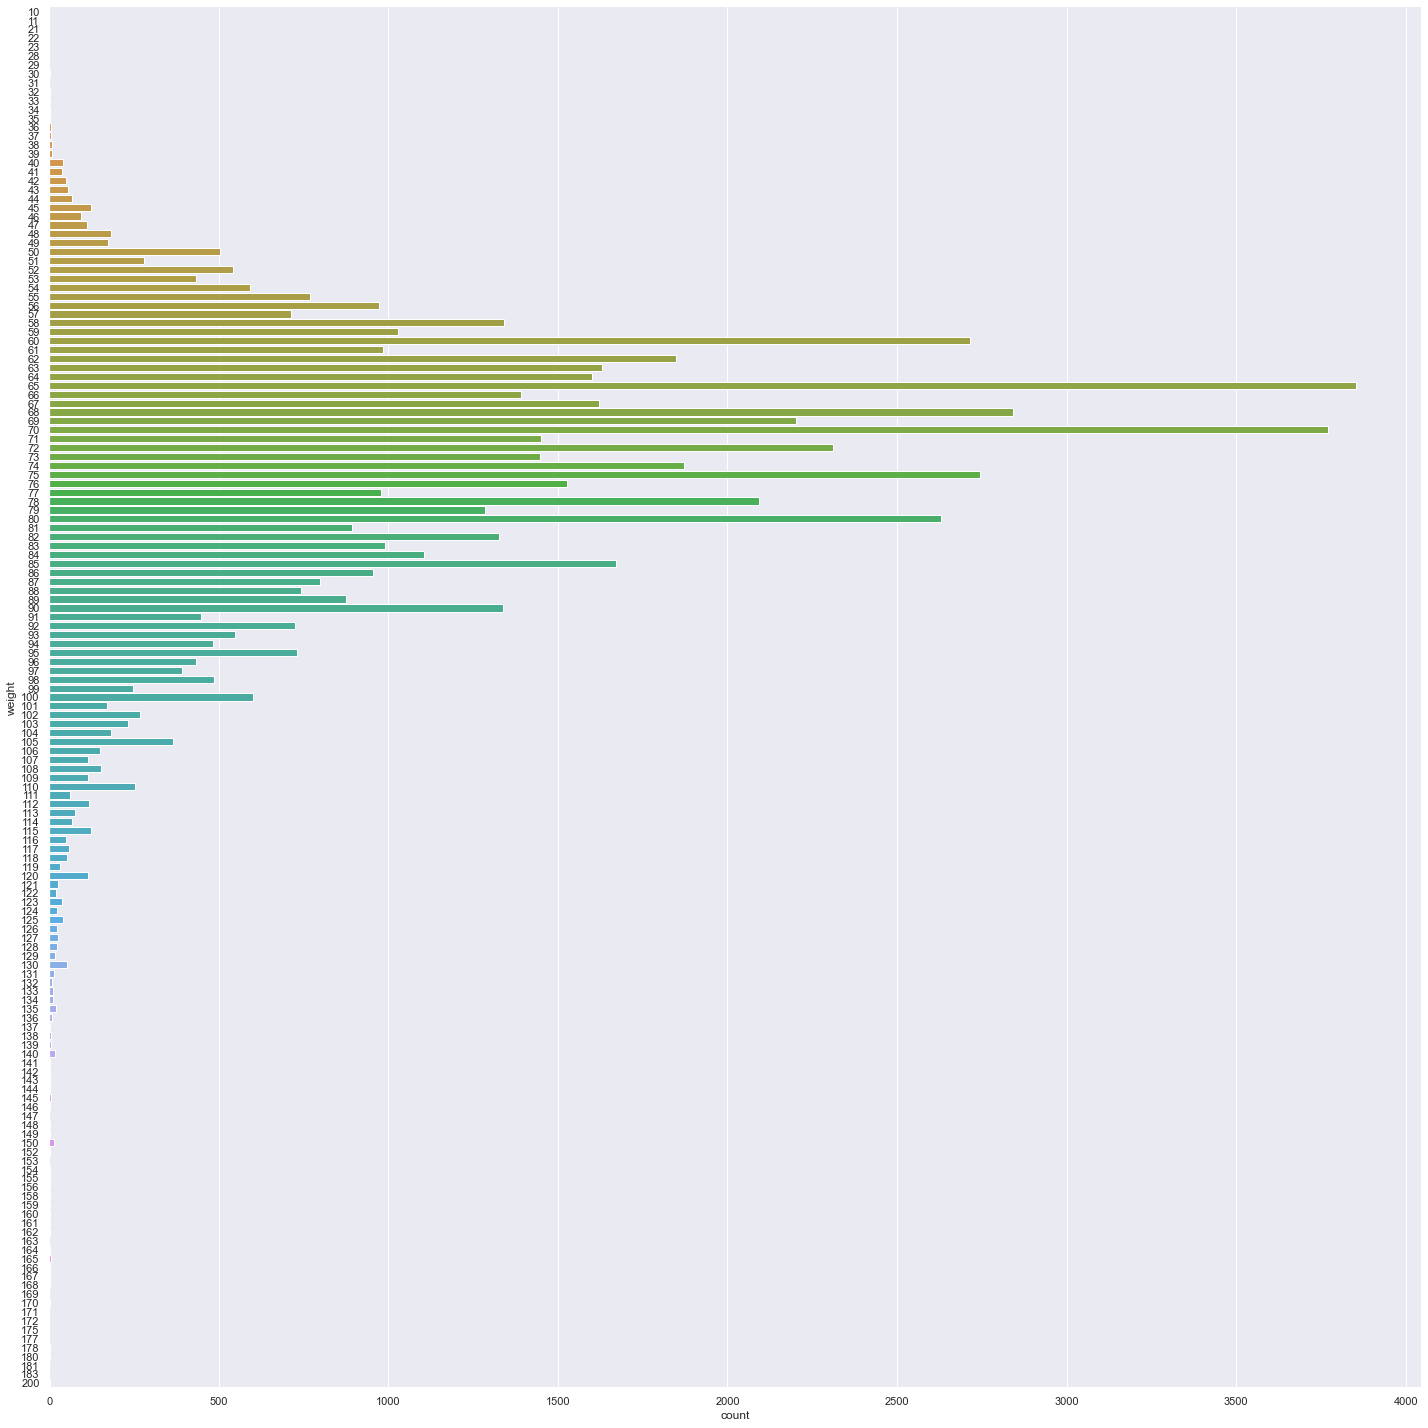

In [ ]:
sb.catplot(y = 'weight', data = cardioCatData, kind = "count", height = 20,)

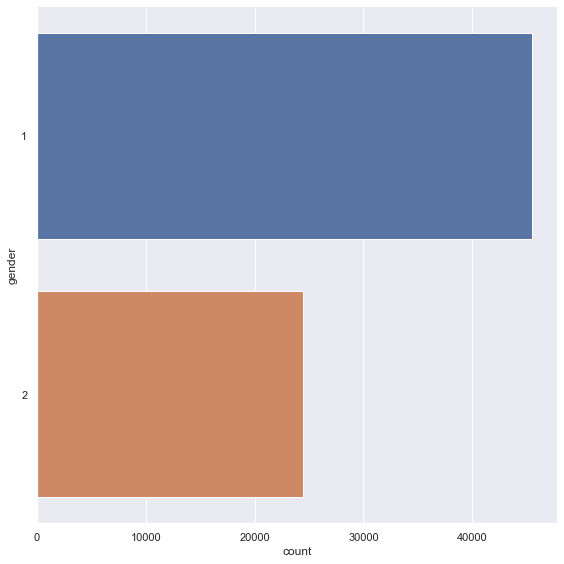

In [ ]:
sb.catplot(y = 'gender', data = cardioCatData, kind = "count", height = 8,)

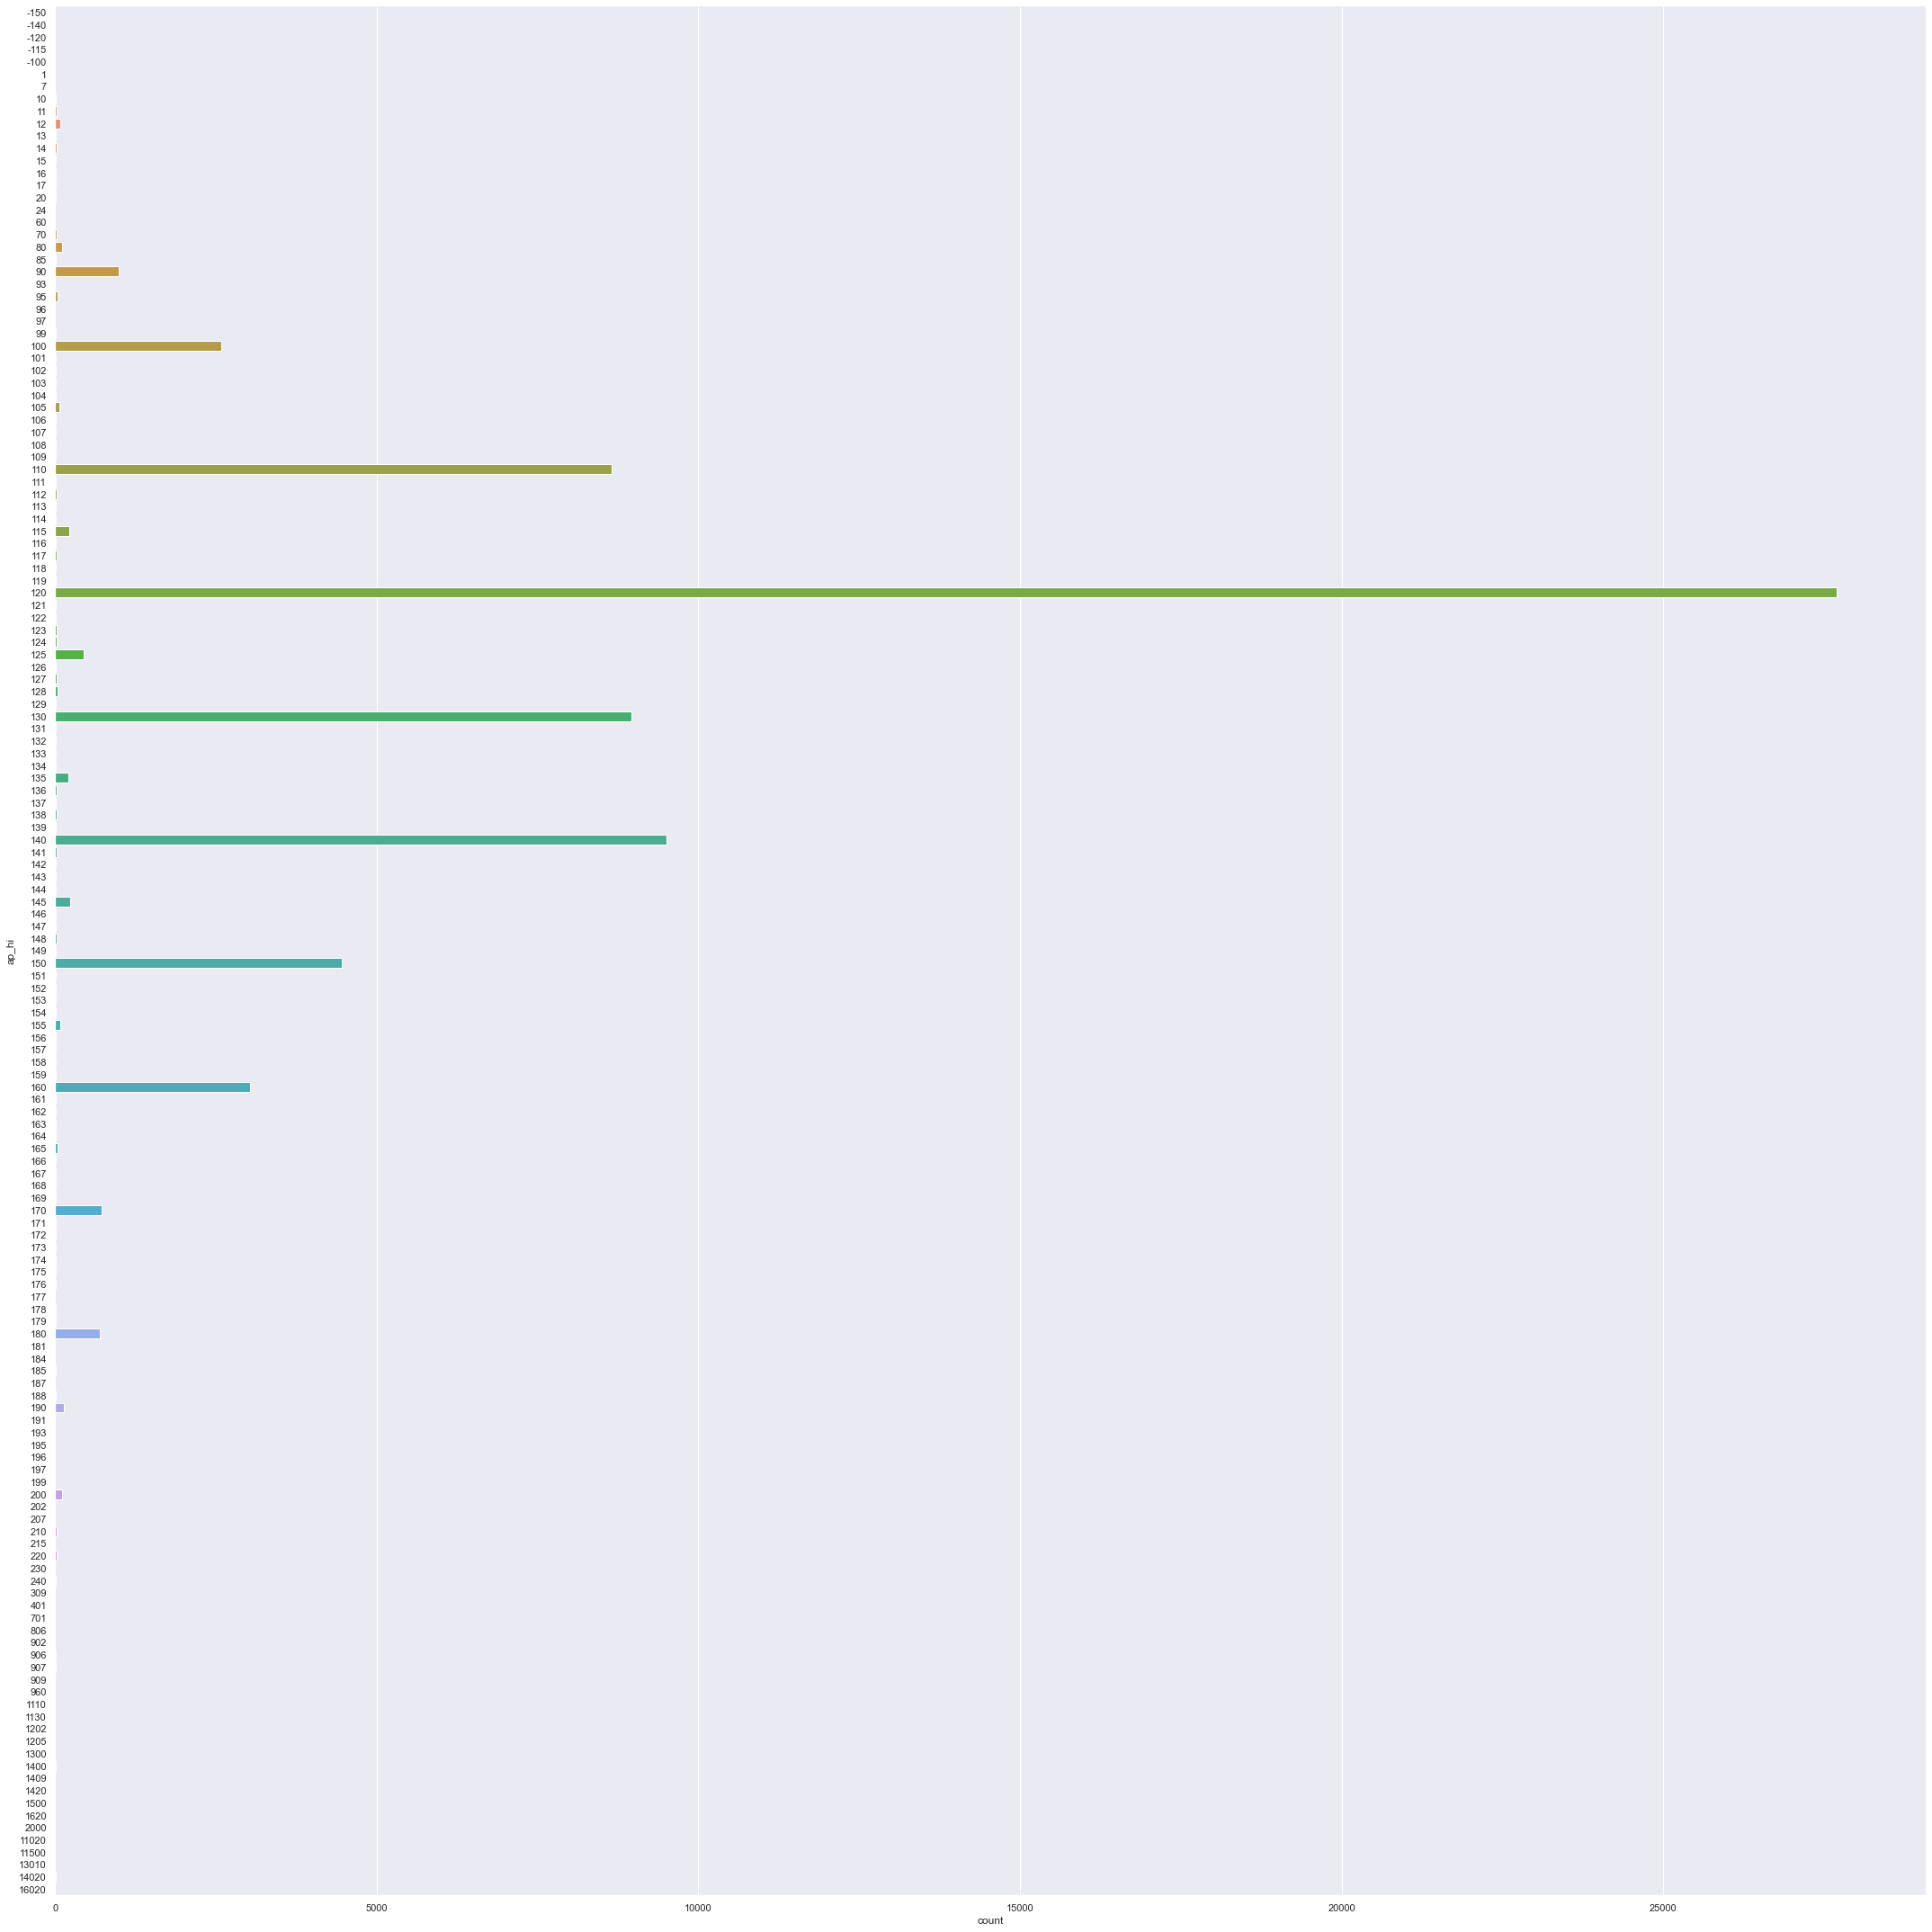

In [ ]:
sb.catplot(y = 'ap_hi', data = cardioCatData, kind = "count", height = 30,)

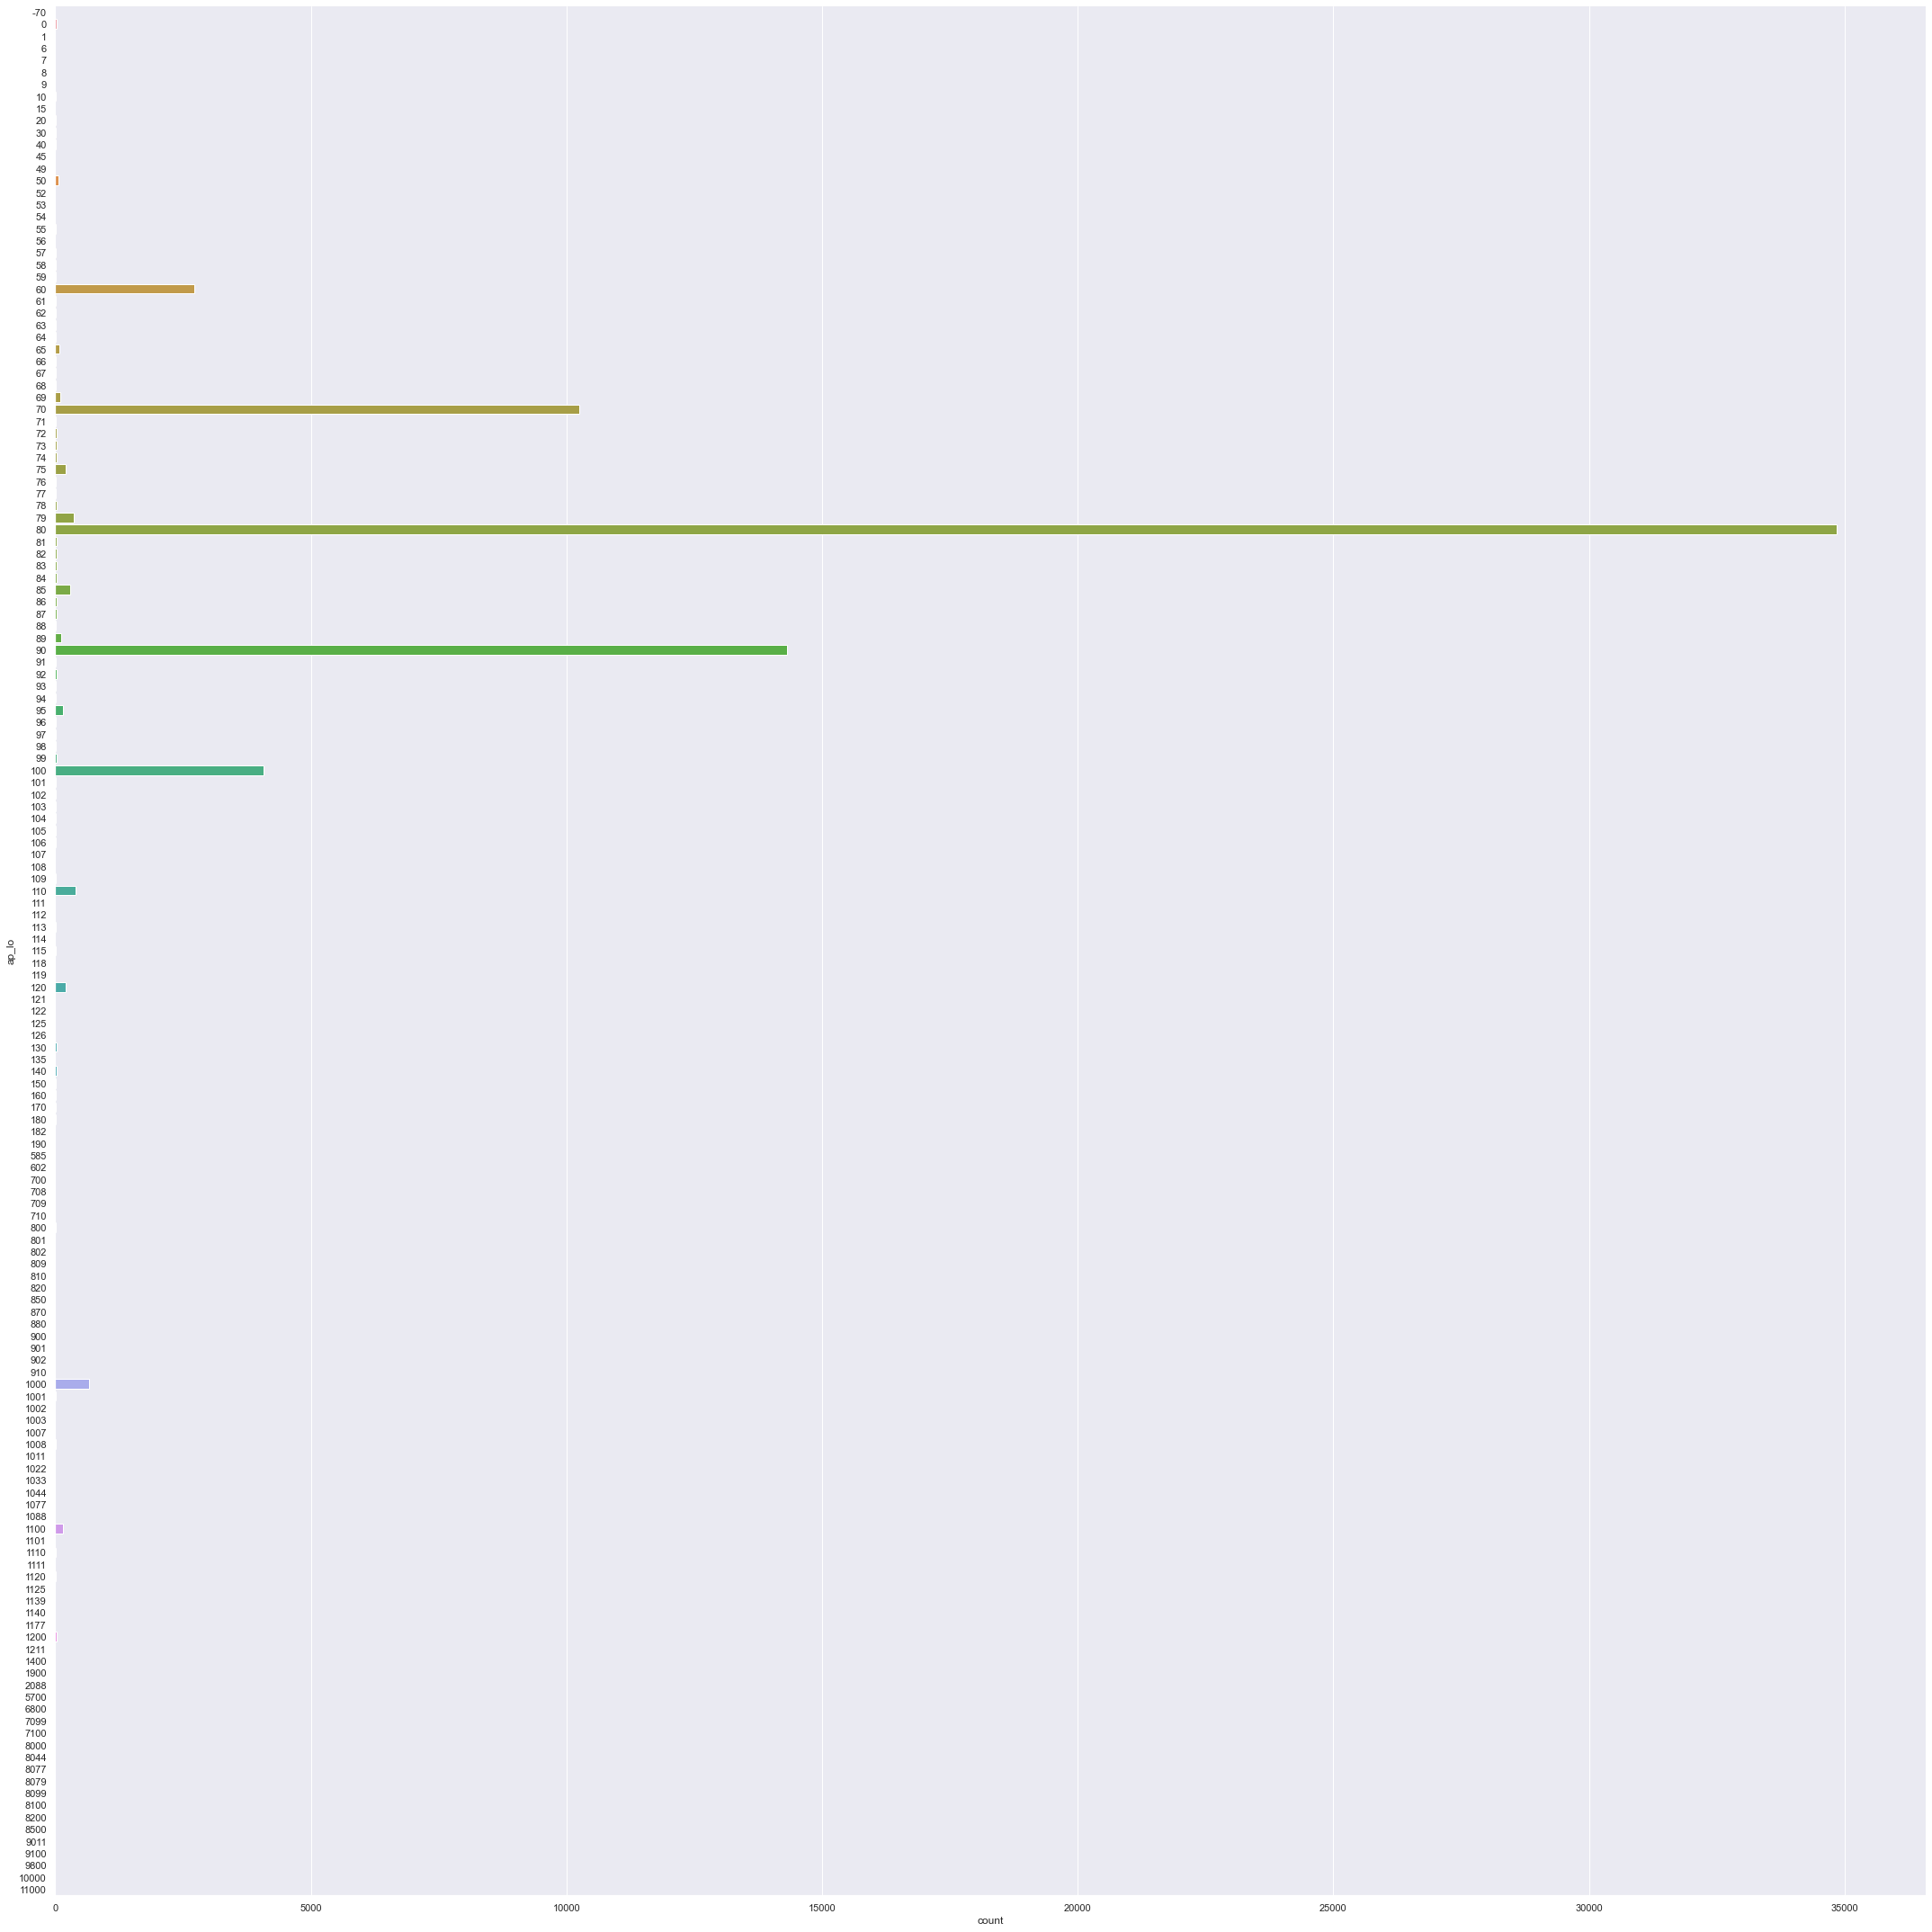

In [ ]:
sb.catplot(y = 'ap_lo', data = cardioCatData, kind = "count", height = 30,)

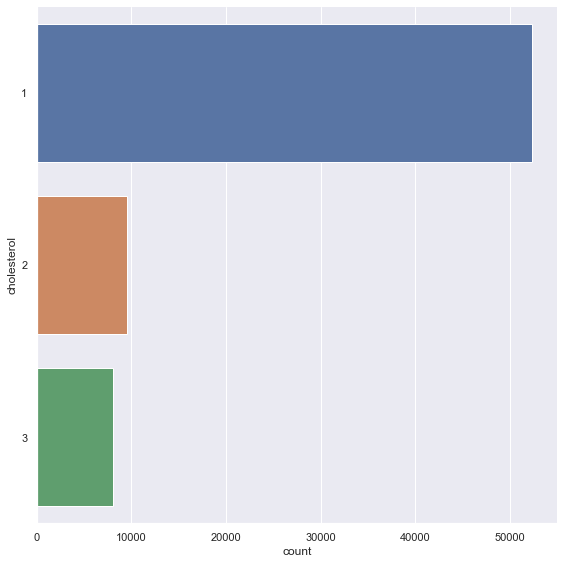

In [ ]:
sb.catplot(y = 'cholesterol', data = cardioCatData, kind = "count", height = 8,)

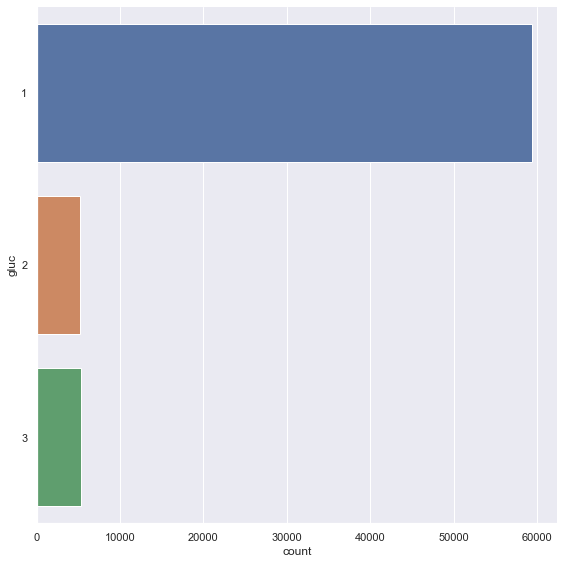

In [ ]:
sb.catplot(y = 'gluc', data = cardioCatData, kind = "count", height = 8,)

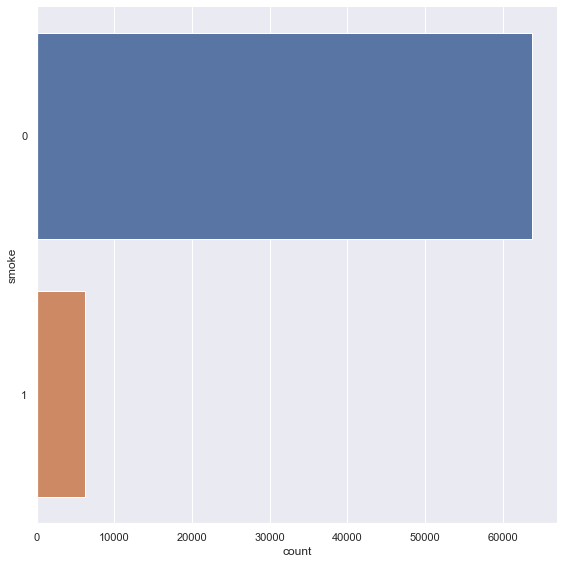

In [ ]:
sb.catplot(y = 'smoke', data = cardioCatData, kind = "count", height = 8,)

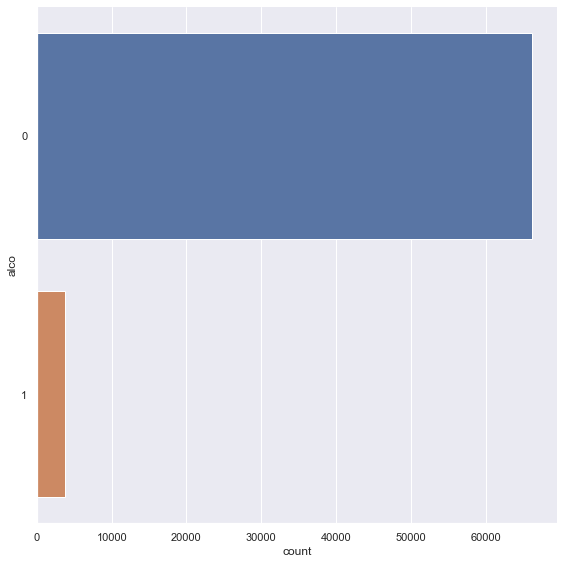

In [ ]:
sb.catplot(y = 'alco', data = cardioCatData, kind = "count", height = 8,)

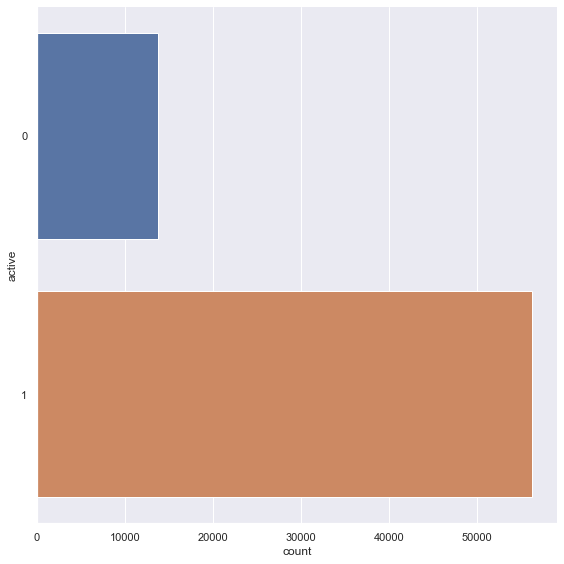

In [ ]:
sb.catplot(y = 'active', data = cardioCatData, kind = "count", height = 8,)

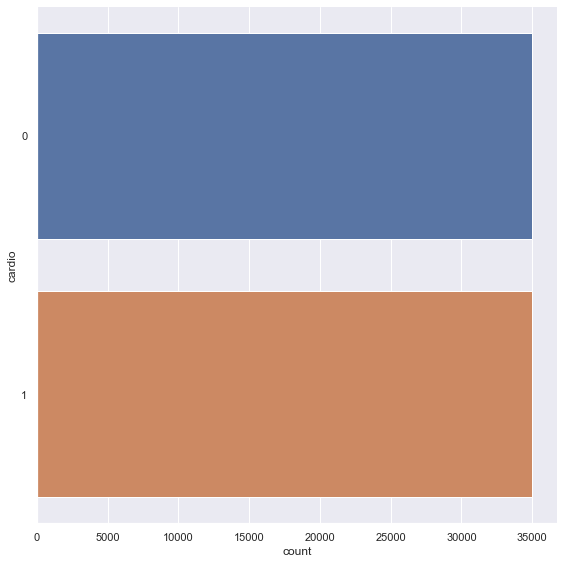

In [ ]:
sb.catplot(y = 'cardio', data = cardioCatData, kind = "count", height = 8,)